## Credit Card Fraud Detection

**Task : Final Project
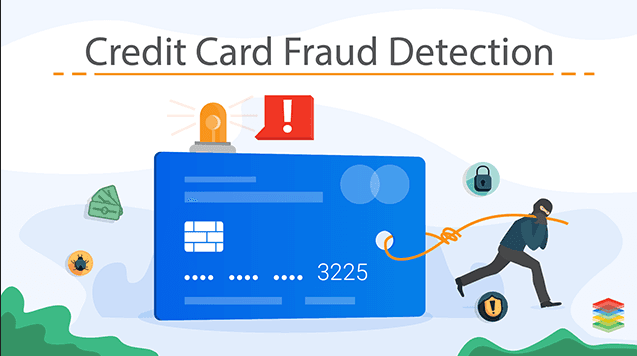

### Team : Group 7
Aditya Bommireddipalli (100892785) - ML Engineer       
Ayesha Sarah (100907046) - Data Engineer                        
Aswin Philip (100906431)  - Project Manager                         
Chinnari Vanukuri (100905837) - Tester                       
Nithish Thokala (100902425) -  Data Analyst                           


In [1]:
#Importing the Dependencies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing classifiers and performance metrics
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

#Sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading a dataset to pandas dataframe

credit_card_data = pd.read_csv("C:/Users/adity/OneDrive/Desktop/College Docs/SEM I Courses/AIDI_1003 - Capstone Term I/Capstone Project Files/creditcard.csv")
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Checking for missing,null values

In [4]:
# Checking null values 
credit_card_data.isnull().sum().any()

False

## Data Analysis

In [5]:
# Checking the distribution of legit and fraudulent transactions in class column
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# percentage of frauds and non frauds

print('No Fraud', round(credit_card_data['Class'].value_counts()[0]/len(credit_card_data)*100,2),' % of the dataset')
print('Fraud', round(credit_card_data['Class'].value_counts()[1]/len(credit_card_data)*100,2),' % of the dataset')

No Fraud 99.83  % of the dataset
Fraud 0.17  % of the dataset


### Most transactions are Non-Fraud so the data is heavily imbalanced. 

Text(0.5, 1.0, 'Class Distribution \n (0: no Fraud || 1: Fraud)')

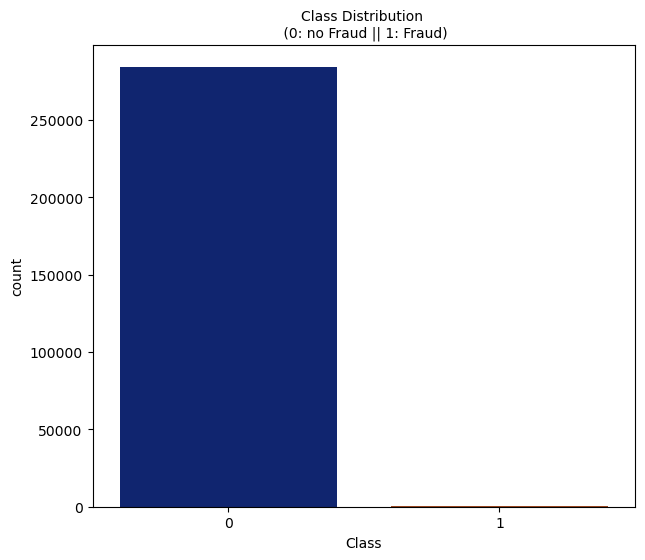

In [7]:
# Plotting the class distribution 

plt.figure(figsize=(7,6))
sns.countplot(x='Class',data=credit_card_data,palette='dark')
plt.title('Class Distribution \n (0: no Fraud || 1: Fraud)',fontsize=10)

## Standarizing the feature which is not PCA transformed

In [8]:
#Standardizing the "Amount" Column

from sklearn.preprocessing import StandardScaler

credit_card_data['normAmount'] = StandardScaler().fit_transform(credit_card_data[['Amount']])
credit_card_data.drop(['Time','Amount'],axis=1,inplace=True)
credit_card_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


## Correlation Matrix

<AxesSubplot:>

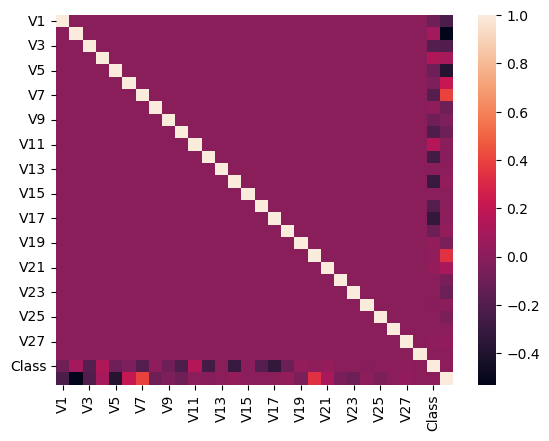

In [9]:
sns.heatmap(credit_card_data.corr(),cbar = True)

### We could not see much from the correlation analysis as the feature names are hidden by PCA

In [10]:
# Splitting the data into features and target

x = credit_card_data.drop(columns='Class',axis=1)
y = credit_card_data['Class']

## Data Sampling

In [11]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Getting shape of train and test datasets
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227845, 29) (56962, 29) (227845,) (56962,)


In [13]:
# Performing oversampling using SMOTE
print("Before oversampling the num of class '0' :",format(sum(y_train==0)))
print("Before oversampling the num of class '1' :\n",format(sum(y_train==1)))

smt = SMOTE(random_state=42)

X_train_res, y_train_res = smt.fit_resample(X_train,y_train.ravel())

print("After oversampling, the shape of x_train :",format(X_train_res.shape))
print("After oversampling the shape of y_train :\n",format(y_train_res.shape))

print("After oversampling the num of class '0' :",format(sum(y_train_res==0)))
print("After oversampling the num of class '1' :\n",format(sum(y_train_res==1)))

Before oversampling the num of class '0' : 227451
Before oversampling the num of class '1' :
 394
After oversampling, the shape of x_train : (454902, 29)
After oversampling the shape of y_train :
 (454902,)
After oversampling the num of class '0' : 227451
After oversampling the num of class '1' :
 227451


## Building the model classifiers

In [14]:
# Adding classifiers to votingClassfier
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', LogisticRegression(random_state=42,max_iter=1000)),
        ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
        ('XGB Classifier',XGBClassifier(random_state=42)),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Extra Trees Classfier', ExtraTreesClassifier(random_state=42))
        
    ]
)

# Training the classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(random_state=42)),
                             ('XGB Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categ...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                

## Applying Evaluation Metrics to each of the Model classifiers

In [15]:
# Getting an evaluation from each of estimators

# Evaluating individual estimator's score

for name, clf in voting_clf.named_estimators_.items():
    y_pred = clf.predict(X_test)
    
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    # Printing the results
    print(f'{name}:')
    print(f'Precision: {prec:.3f}, Recall: {rec:.3f}, F1 Score: {f1:.3f}\n')


Logistic Regression:
Precision: 0.864, Recall: 0.582, F1 Score: 0.695

Random Forest Classifier:
Precision: 0.974, Recall: 0.765, F1 Score: 0.857

XGB Classifier:
Precision: 0.975, Recall: 0.806, F1 Score: 0.883

Decision Tree:
Precision: 0.704, Recall: 0.776, F1 Score: 0.738

Extra Trees Classfier:
Precision: 0.963, Recall: 0.786, F1 Score: 0.865



## Plotting ROC-AUC Curves for all the models

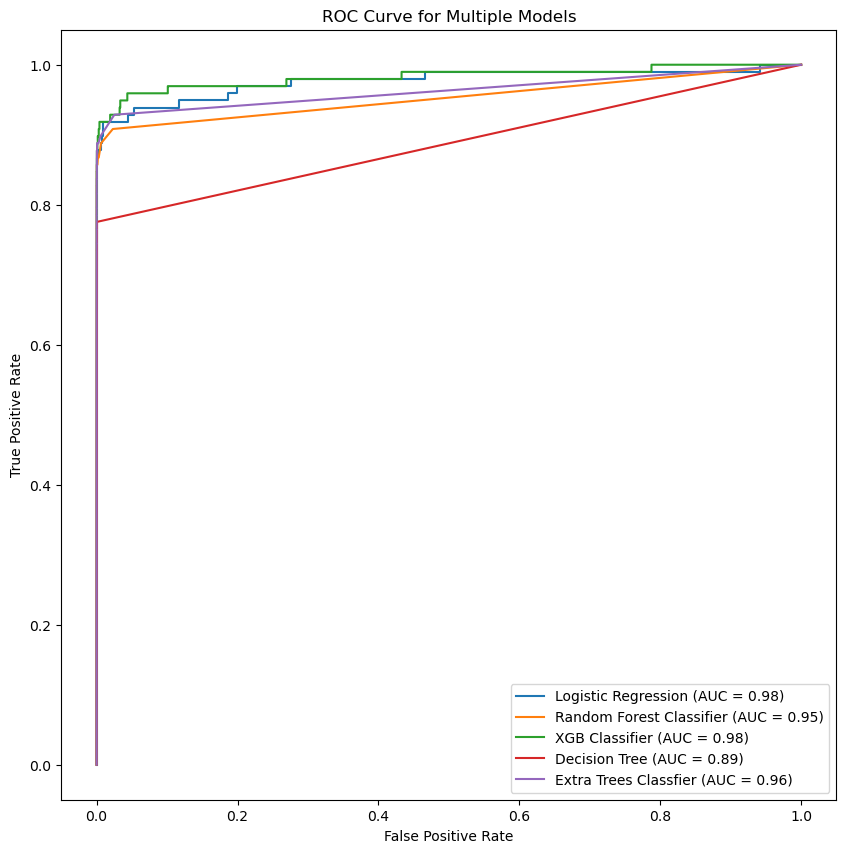

In [16]:
# plot ROC curves for each model
plt.figure(figsize=(10, 10))
for name, model in voting_clf.named_estimators_.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# add legend and title to the plot
plt.legend(loc='lower right')
plt.title('ROC Curve for Multiple Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### As we can see from the above AUC curves , we can conclude that XGB classifier performs better than the rest of models for our current dataset . We can also try improving the score once we know more about features and then by performing some feature selection methods to select some of them. 

## Testing with custom input

In [17]:
input_data = (-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = voting_clf.predict(input_data_reshaped)
print("Prediction is ",prediction)

if (prediction[0] == 0):
  print('Legitimate Transaction')
else:
  print('Fraudulent Transaction')

Prediction is  [1]
Fraudulent Transaction


C:\Users\adity\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\adity\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


### As we can see from above cell , our model has succesfully predicted the class as 1 when we gave input of fraudulent transaction. We got "UserWarning"  only because our dataset doesn't have valid feature names so we can ignore them. 

### Future Work : As this model was succesful, we'll try implementing it with UI and deploy it with some platforms like streamlit or heroku and monitor its performance and fine-tune the model accordingly to improve it's performance. We'll also try to implement some new models once current performance is stable . These would be our future milestones for this project. 